In [1]:
import matplotlib.pyplot as plt
import numpy as np
import glob

from read_log import TrainingRunResult, read_log

def make_label(args,label_args):
    label = []
    for argname in label_args:
        label.append(f"{argname}={args[argname]}")
    return ",".join(label)

def make_plot(results : TrainingRunResult, label_args=["lr","batch_size"], metric="accuracy",):
    num_epochs = len(results.epoch_evals)
    metrics = []
    for epoch_res in results.epoch_evals:
        metrics.append(get_metric(epoch_res, metric))
    plt.plot(range(1,num_epochs+1), metrics,label=make_label(results.args,label_args))


/local/scratch-3/fwe21/miniconda3/envs/torch/lib/python3.9/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
def make_plots(logfile, metric="accuracy"):
    training_runs = read_log(logfile)
    done_runs = set()
    for run in training_runs:
        if str(run.args) in done_runs:
            continue
        make_plot(run, metric=metric)
        done_runs.add(str(run.args))
    plt.legend()
    plt.show()

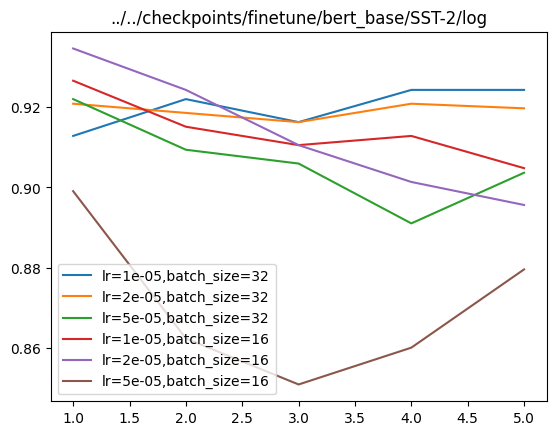

In [3]:

for dataset in datasets:
    for logfile in glob.glob(f"../../checkpoints/finetune/bert_base/{dataset}/**/log",recursive=True):
        plt.title(logfile)
        make_plots(logfile, metric="matthews" if dataset == "CoLA" else "accuracy")

/tmp/ipykernel_1387979/722730178.py:23: FutureWarning: In a future version of pandas all arguments of DataFrame.pivot will be keyword-only.
  sns.heatmap(df.pivot("lr","batch_size","last3_mean"), annot=df.pivot("lr","batch_size","score_str"),fmt="")


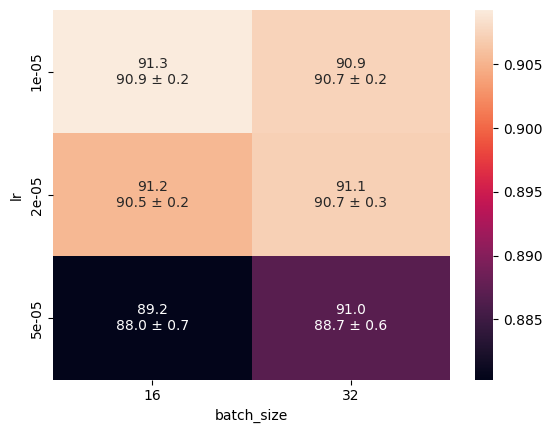

/tmp/ipykernel_1387979/722730178.py:23: FutureWarning: In a future version of pandas all arguments of DataFrame.pivot will be keyword-only.
  sns.heatmap(df.pivot("lr","batch_size","last3_mean"), annot=df.pivot("lr","batch_size","score_str"),fmt="")


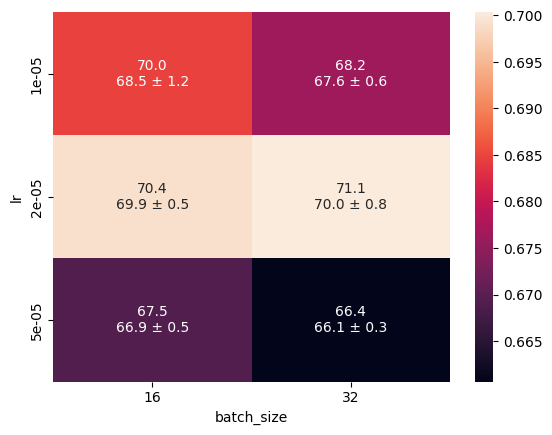

/tmp/ipykernel_1387979/722730178.py:23: FutureWarning: In a future version of pandas all arguments of DataFrame.pivot will be keyword-only.
  sns.heatmap(df.pivot("lr","batch_size","last3_mean"), annot=df.pivot("lr","batch_size","score_str"),fmt="")


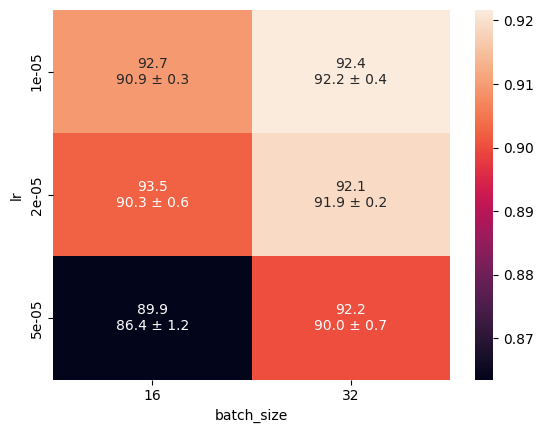

/tmp/ipykernel_1387979/722730178.py:23: FutureWarning: In a future version of pandas all arguments of DataFrame.pivot will be keyword-only.
  sns.heatmap(df.pivot("lr","batch_size","last3_mean"), annot=df.pivot("lr","batch_size","score_str"),fmt="")


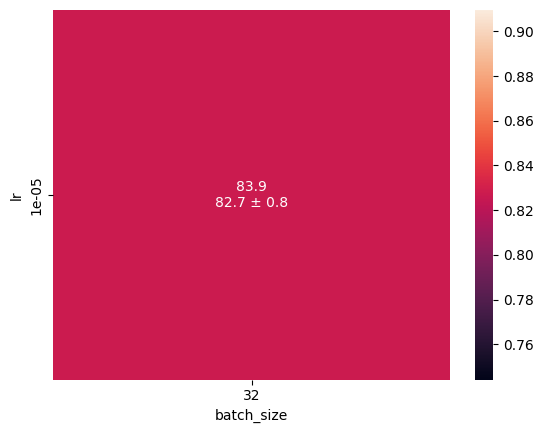

/tmp/ipykernel_1387979/722730178.py:23: FutureWarning: In a future version of pandas all arguments of DataFrame.pivot will be keyword-only.
  sns.heatmap(df.pivot("lr","batch_size","last3_mean"), annot=df.pivot("lr","batch_size","score_str"),fmt="")


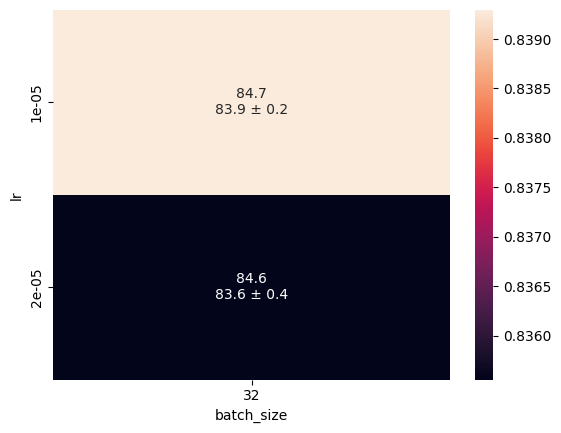

/tmp/ipykernel_1387979/722730178.py:23: FutureWarning: In a future version of pandas all arguments of DataFrame.pivot will be keyword-only.
  sns.heatmap(df.pivot("lr","batch_size","last3_mean"), annot=df.pivot("lr","batch_size","score_str"),fmt="")


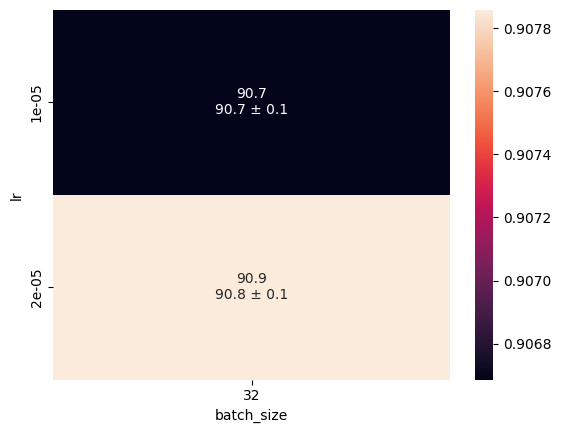

/tmp/ipykernel_1387979/722730178.py:23: FutureWarning: In a future version of pandas all arguments of DataFrame.pivot will be keyword-only.
  sns.heatmap(df.pivot("lr","batch_size","last3_mean"), annot=df.pivot("lr","batch_size","score_str"),fmt="")


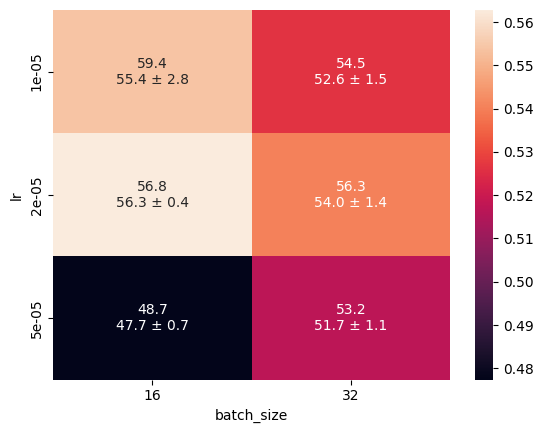

In [4]:
import seaborn as sns
import pandas as pd

def to_dataframe(logfile, metric="accuracy"):
    training_runs = read_log(logfile)

    rows = []
    for run in training_runs:
        epoch_metrics = [get_metric(epoch_res, metric) for epoch_res in run.epoch_evals]
        
        rows.append({
            "lr":run.args["lr"],
            "batch_size":run.args["batch_size"],
            "best_metric":max(epoch_metrics),
            "last3_mean":np.mean(epoch_metrics[-3:]),
            "last3_std":np.std(epoch_metrics[-3:]),
        })
    
    return pd.DataFrame(rows)

def plot_heatmap(df):
    df["score_str"] =  df.best_metric.map(lambda x: f"{x*100:.1f}\n") + df.last3_mean.map(lambda x: f"{x*100:.1f}") + df.last3_std.map(lambda x: f" ± {x*100:.1f}")
    sns.heatmap(df.pivot("lr","batch_size","best_metric"), annot=df.pivot("lr","batch_size","score_str"),fmt="")
    plt.show()

datasets = ["QNLI","RTE","SST-2","MRPC","MNLI","QQP","CoLA"]

for dataset in datasets:
    for logfile in glob.glob(f"../../checkpoints/finetune/bert_base/{dataset}/**/log",recursive=True):
        df = to_dataframe(logfile, metric="matthews" if dataset == "CoLA" else "accuracy")
        plot_heatmap(df)
        break